In [2]:
import pandas as pd
df = pd.read_csv("../data/reddit_ai_cleaned.csv")

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["text"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

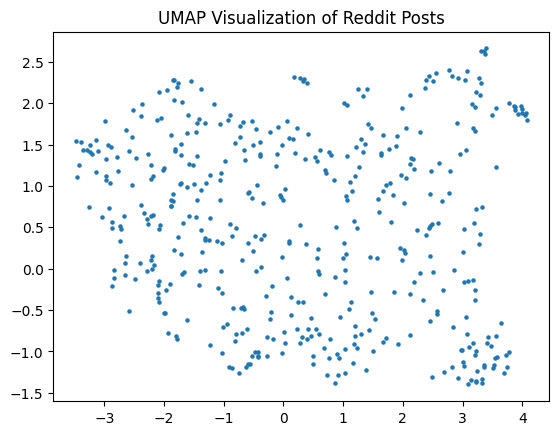

In [7]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)

plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5)
plt.title("UMAP Visualization of Reddit Posts")
plt.show()


In [10]:
# add bianry label to predict which posts will get high engagement
df["high_score"] = (df["score"] >= df["score"].median()).astype(int)
df.head()

,title_clean,selftext_clean,subreddit,score,upvote_ratio,num_comments,post_length,sentiment_polarity,sentiment_subjectivity,created_datetime,date,year,text,high_score
0,How to retrieve instructions given to annotato...,"Hello, I am a communications student, and as p...",MachineLearning,13,0.93,7,171,0.095833,0.404333,2025-10-10 08:49:17,2025-10-10,2025,How to retrieve instructions given to annotato...,1
1,Built an ML-based Variant Impact Predictor non...,"Hey folks, I ve been working on a small ML pro...",MachineLearning,0,0.40,10,244,0.131198,0.393388,2025-10-09 18:40:15,2025-10-09,2025,Built an ML-based Variant Impact Predictor non...,0
2,Tensorflow and Musicnn,"Hi all, I m struggling with Tensorflow and an ...",MachineLearning,1,0.57,11,386,0.135743,0.404892,2025-10-06 07:19:05,2025-10-06,2025,"Tensorflow and Musicnn Hi all, I m struggling ...",0
3,Experiences with active learning for real appl...,I'm tinkering with an application of human pos...,MachineLearning,4,0.83,6,310,-0.025505,0.501641,2025-10-04 21:53:21,2025-10-04,2025,Experiences with active learning for real appl...,0
4,Thesis direction mechanistic interpretability ...,"Hi all, I'm an undergrad Computer Science stud...",MachineLearning,12,0.80,13,165,0.219318,0.450271,2025-10-02 20:50:44,2025-10-02,2025,Thesis direction mechanistic interpretability ...,1


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score

X = embeddings
y = df["high_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.53      0.55      0.54        38
           1       0.68      0.65      0.67        55

    accuracy                           0.61        93
   macro avg       0.60      0.60      0.60        93
weighted avg       0.62      0.61      0.61        93

